# Yabble's AI Test

Hello! Given the rise of code generation LLMs traditional coding tests are completely useless these days. So we've come up with something that should be hard for an AI to code without some sort of direction from a human, so this means this test is really about giving you a problem and seeing how you 

- Solve a problem using an LLM(s) as a tool, and
- Communicate this solution.

We're mainly see want to see a proof-of-concept so doesn't need to be an end-to-end working solution. Just a sketch so we can see **your thinking** behind your solution.

Fork this repo and send us a link when you are done to alex@yabble.com

---
WANRING: I want to see _your_ thinking. You can try and use an LLM to actually do this entire task but we've seen a lot of them and the results are not very good, and its obvious that an LLM produced the work. Please don't waste both of our time. Remember, the objective here is not to complete the task, but to demonstrate how _you_ solve a problem.

## The Problem

As part of this repo we have supplied a dataset `walmart.csv` there are 3 columns of open text responses. The task is to perform, what the market research community call, "theme counting" or "thematic analysis: on one or all of these columns. A brief definition of this task might be:

> [Thematic analysis](https://fastercapital.com/content/Thematic-Analysis--Uncovering-Patterns--Thematic-Analysis-in-Qualitative-Research.html) is a qualitative research technique that involves systematically identifying, analyzing, and reporting patterns (themes) within textual, visual, or audio data. It is widely used in marketing research to explore consumer opinions, sentiments, and experiences. Researchers begin by immersing themselves in the data, identifying recurring patterns, and organizing them into meaningful themes.

### Example

So a basic example would be if you had 3 responses from the dataset column "What do you think Target does better than Walmart?":
1. "Their overall approach to customers and the benefits of supporting the community and it's employees"
2. "Target has a better variety"
3. "Employees are more helpful and the stores are much cleaner and better organized"
4. "They have more in style things and the employees are nice"

So you might tags these with "themes" as follows:
1. Customer support; Supports Community; Supports Employees
2. Variety
3. Customer support; Clean stores; Well Organised
4. Variety; Customer support

The idea with themes is to group responses to make further porcess easier. You need to find a balance between having general themes while at the same time capturing enough neuonce for the themes to be useful. 

Bonus marks for adding sentiment to your themes so the same theme can ether be positive, negative or neutral i.e. Customer Service (positive) or Customer Service (Negative) etc

### Please...
- Document your code and your thinking. 
- Doesn't have to be perfect, show the experiments you did to get to where you ended up. 
- Link to external sources of inspiration.
- Write a "Summary" at the begining which outlines your approch(es)
- Write a "Conclusion" section at the end.

Good luck!

## Raw Data

The data is a typical CSV we migth get from a client. Column labels are the survey question text.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
import csv
# The issue is an unterminated string literal in the file path. 
# To fix this, ensure the string is properly closed with a double quote.

with open("/Users/foadmarzoughi/Documents/workspace/projects/yab-cha/yabble-theme-counting-test/yabble-theme-counting-test/Data/raw/walmart.csv") as fp:
    reader = csv.DictReader(fp)
    data = [row for row in reader]
data[:2:3]

[{'Session ID': '94f2d4c3-b513-411c-b505-a11290b3f0f5',
  'Date started': '10/02/2022 01:03',
  'Imagine you are writing a complaint letter to the head of Walmart...in detail, tell us the things you would complain about and why they matter?': "The customer service that your company gives is horrible and tacky. Your company has no morality or empathy for it's customers \nAll you care about is profits over customer.",
  'What do you think Target does better than Walmart?': "Their overall approach to customers and the benefits of supporting the community and it's employees.",
  'What do you LOVE most about Walmart?': "There's nothing I LOVE about Walmart.",
  'Gender': 'Male',
  'Age group': '45-54',
  'State': 'Texas',
  'Who does it better? Target or Walmart?': 'Target'}]

### Data Preprocessing

In [3]:
# Convert the list of dictionaries to a pandas DataFrame
survey_responses_df = pd.DataFrame(data)
survey_responses_df.head()

,Session ID,Date started,"Imagine you are writing a complaint letter to the head of Walmart...in detail, tell us the things you would complain about and why they matter?",What do you think Target does better than Walmart?,What do you LOVE most about Walmart?,Gender,Age group,State,Who does it better? Target or Walmart?
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,,The low price,Male,25-34,Texas,Walmart


In [4]:
#rename the fields of dataframe to simplified names 

# Rename the columns of the DataFrame to simplified names
survey_responses_df.columns = [
    'session_id', 
    'date_started', 
    'walmart_complaint', 
    'target_better_than_walmart', 
    'love_about_walmart', 
    'gender', 
    'age_group', 
    'state', 
    'who_does_it_better'
]

survey_responses_df.head()

,session_id,date_started,walmart_complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,,The low price,Male,25-34,Texas,Walmart


In [5]:
#idenify the missing values 
missing_values = survey_responses_df.isnull().sum()
missing_values

session_id                    0
date_started                  0
walmart_complaint             0
target_better_than_walmart    0
love_about_walmart            0
gender                        0
age_group                     0
state                         0
who_does_it_better            0
dtype: int64

In [6]:
cols = ['walmart_complaint', 'target_better_than_walmart', 'love_about_walmart', 'gender', 'age_group', 'state', 'who_does_it_better']
survey_responses_df[cols] = survey_responses_df[cols].replace(r'^\s*$', np.nan, regex=True)
survey_responses_df




,session_id,date_started,walmart_complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,NaN,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,NaN,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,NaN,The low price,Male,25-34,Texas,Walmart
...,...,...,...,...,...,...,...,...,...
248,95b0f245-8a8c-4c9c-a70e-6e4746157dd7,10/02/2022 01:00,well i was in walmart and the cashier was rude...,NaN,i save money,Male,35-44,Texas,Walmart
249,489b761c-386b-4f9b-a009-4a1bdeb6baf2,10/02/2022 01:00,I would bring it to their attention that I am ...,NaN,I like how they are conveniently located to me...,Female,35-44,Texas,Walmart
250,679fc05f-950c-4ecc-a139-1dcc19239661,10/02/2022 01:00,i dont like how the staff sometimes doesnt be ...,target is amazing thats my favorite go to stor...,because walmart is too much,Female,18-24,Texas,Target
251,b127b9f3-0f98-466c-af6e-c727588b6312,10/02/2022 01:00,coupon issues should be fixed and employees sh...,NaN,everything in one place,Female,65-74,Texas,Walmart


In [7]:
#idenify the missing values 
missing_values = survey_responses_df.isnull().sum()
missing_values

session_id                      0
date_started                    0
walmart_complaint               0
target_better_than_walmart    174
love_about_walmart              0
gender                          0
age_group                       7
state                           0
who_does_it_better              0
dtype: int64

In [8]:

# Import necessary libraries for text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure NLTK resources are available
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase (Normalize Texts)
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Create new columns to store the preprocessed text while keeping the original columns
survey_responses_df['walmart_complaint_processed'] = survey_responses_df['walmart_complaint'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)
survey_responses_df['target_better_than_walmart_processed'] = survey_responses_df['target_better_than_walmart'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)
survey_responses_df['love_about_walmart_processed'] = survey_responses_df['love_about_walmart'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)


survey_responses_df.head()

,session_id,date_started,walmart_complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better,walmart_complaint_processed,target_better_than_walmart_processed,love_about_walmart_processed
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target,"[customer, service, company, give, horrible, t...","[overall, approach, customer, benefit, support...","[there, nothing, love, walmart]"
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,NaN,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart,"[would, complain, register, need, available, t...",NaN,"[love, diversity, product, offer]"
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target,"[quit, taking, cash, 8checkout, dont, blame, c...","[target, still, snack, bar, unlike, walmart]","[employee, try, finely, hnt, one]"
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,NaN,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart,"[dont, go, walmart, run, long, time, there, al...",NaN,"[small, town, live, walmart, place, shop, also..."
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,NaN,The low price,Male,25-34,Texas,Walmart,"[east, waco, need, walmart, neighborhood, groc...",NaN,"[low, price]"


In [9]:
# Identify the number of distinct values in the specified columns
distinct_gender_count = survey_responses_df['gender'].unique()
distinct_age_group_count = survey_responses_df['age_group'].unique()
distinct_state_count = survey_responses_df['state'].unique()
distinct_who_does_it_better_count = survey_responses_df['who_does_it_better'].unique()

# Print the results
print(f"distinct genders: {distinct_gender_count}")
print(f"distinct age groups: {distinct_age_group_count}")
print(f"distinct states: {distinct_state_count}")
print(f"distinct 'who does it better' responses: {distinct_who_does_it_better_count}")


distinct genders: ['Male' 'Female' 'Gender diverse']
distinct age groups: ['45-54' '18-24' '55-64' '35-44' '25-34' nan '65-74']
distinct states: ['Texas']
distinct 'who does it better' responses: ['Target' 'Walmart']


In [10]:
survey_responses_df['gender'].value_counts(dropna=False)
survey_responses_df['age_group'].value_counts(dropna=False)
survey_responses_df['state'].value_counts(dropna=False)
survey_responses_df['who_does_it_better'].value_counts(dropna=False)


print(survey_responses_df['gender'].value_counts(dropna=False))
print(survey_responses_df['age_group'].value_counts(dropna=False))
print(survey_responses_df['state'].value_counts(dropna=False))
print(survey_responses_df['who_does_it_better'].value_counts(dropna=False))


gender
Female            143
Male              109
Gender diverse      1
Name: count, dtype: int64
age_group
45-54    53
25-34    50
35-44    43
18-24    39
55-64    34
65-74    27
NaN       7
Name: count, dtype: int64
state
Texas    253
Name: count, dtype: int64
who_does_it_better
Walmart    174
Target      79
Name: count, dtype: int64


In [11]:
### Descriptive Analysis on dataset to undersant more about the dataframe 

# Display basic information about the DataFrame
print("DataFrame Information:")
print(survey_responses_df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(survey_responses_df.describe())

# Display the distribution of categorical columns
print("\nDistribution of Categorical Columns:")
for column in ['gender', 'age_group', 'state', 'who_does_it_better']:
    print(f"\n{column} distribution:")
    print(survey_responses_df[column].value_counts())

# Check for missing values in the DataFrame
print("\nMissing Values in Each Column:")
print(survey_responses_df.isnull().sum())

print("\nFind Duplicated ids")
print(survey_responses_df['session_id'].duplicated().sum())



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   session_id                            253 non-null    object
 1   date_started                          253 non-null    object
 2   walmart_complaint                     253 non-null    object
 3   target_better_than_walmart            79 non-null     object
 4   love_about_walmart                    253 non-null    object
 5   gender                                253 non-null    object
 6   age_group                             246 non-null    object
 7   state                                 253 non-null    object
 8   who_does_it_better                    253 non-null    object
 9   walmart_complaint_processed           253 non-null    object
 10  target_better_than_walmart_processed  79 non-null     object
 11  love_abou

### Theme Clustering using different techniques and compare the different Methods

In [12]:
survey_responses_df.columns


Index(['session_id', 'date_started', 'walmart_complaint',
       'target_better_than_walmart', 'love_about_walmart', 'gender',
       'age_group', 'state', 'who_does_it_better',
       'walmart_complaint_processed', 'target_better_than_walmart_processed',
       'love_about_walmart_processed'],
      dtype='object')

# Topic Modeling on 1st Question : walmart_complaints

In [13]:
from bertopic import BERTopic

#Topic modeling using Bertopic actually no need preprocessing however after testing we have noticed it is better we use processed text to reduce more noise 

wc_survey_responses_df = survey_responses_df
# Safe token join function
def safe_join(tokens):
    if isinstance(tokens, list):
        return " ".join(tokens)
    return ""

# Prepare text for BERTopic
wc_survey_responses_df['walmart_complaint_for_bertopic'] = wc_survey_responses_df['walmart_complaint_processed'].apply(safe_join)

# Topic modeling for 'walmart_complaint'
topic_model_wc = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics_wc, probs_wc = topic_model_wc.fit_transform(wc_survey_responses_df['walmart_complaint_for_bertopic'])
wc_survey_responses_df['topic_walmart_complaint'] = topics_wc
wc_survey_responses_df['keywords_walmart_complaint'] = [topic_model_wc.get_topic(t)[:7] if t != -1 else [] for t in topics_wc]
print("Walmart Complaint Topics:")
print(topic_model_wc.get_topic_info())







OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Walmart Complaint Topics:
   Topic  Count                              Name  \
0     -1     35      -1_would_complain_stock_time   
1      0    138        0_walmart_store_would_need   
2      1     39  1_customer_service_employee_poor   
3      2     21          2_clean_dirty_store_keep   
4      3     20        3_complain_dont_would_know   

                                      Representation  \
0  [would, complain, stock, time, return, nothing...   
1  [walmart, store, would, need, checkout, line, ...   
2  [customer, service, employee, poor, rude, trea...   
3  [clean, dirty, store, keep, bathroom, could, o...   
4  [complain, dont, would, know, lol, complaint, ...   

                                 Representative_Docs  
0  [thing would complain long line, would complai...  
1  [cleanliness often time visible dirt grime eve...  
2  [customer service always point rude dismissive...  
3  [self checkout faster self checkout number one...  
4  [hi julie wanted know friend going trip 

## Findings 1
### Purppose

In this section, we applied topic modeling using the BERTopic library to analyze open-ended customer complaints related to Walmart. The goal was to uncover common themes and topics across thousands of responses, providing deeper insights into customer sentiment and recurring issues.

### Preprocessing:
Although BERTopic can work with raw text, we noticed improved results after cleaning and preprocessing the text. Specifically, we used a tokenized version of the complaints (walmart_complaint_processed) and safely joined the tokens into strings to form a cleaner input for BERTopic.

### Embedding Model:
We used all-MiniLM-L6-v2, a Sentence-BERT model known for its speed and performance in semantic similarity tasks, to generate dense vector representations of each complaint.

### Topic Modeling:
The model was trained on the preprocessed complaints using BERTopic. Each document was assigned a topic (topic_walmart_complaint), and a list of top keywords for each topic was extracted (keywords_walmart_complaint). 

The BERTopic model successfully clustered the complaints into coherent topics based on semantic similarity.

Each topic was characterized by a set of representative keywords (top 7 terms).

The model also assigned a probability score (probs_wc) to indicate how confidently each complaint belonged to its topic.

### Findings 


    Topic -1: Miscellaneous / Outliers
    Topic 0: Checkout Experience
    Topic 1: Poor Customer Service
    Topic 2: General Needs and Expectations
    Topic 3: Unclear Complaints / Frustrated Tone
    Topic 4: Fresh Produce Quality
    Topic 5: Store Cleanliness


In [14]:
wc_survey_responses_df
# Visualize Walmart Complaint Topics
fig_wc = topic_model_wc.visualize_topics()
fig_wc.show()


In [15]:
topic_model_wc.visualize_barchart()

In [16]:
outliers = wc_survey_responses_df[wc_survey_responses_df['topic_walmart_complaint'] == -1]
outliers

,session_id,date_started,walmart_complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better,walmart_complaint_processed,target_better_than_walmart_processed,love_about_walmart_processed,walmart_complaint_for_bertopic,topic_walmart_complaint,keywords_walmart_complaint
9,f6b496b3-d246-421f-bcab-6b21e4e1cdc0,10/02/2022 01:03,Hi this is Stephanie I'm writing this letter t...,The thing that I target does better is they al...,The best thing I love about Walmart is they ha...,Female,35-44,Texas,Target,"[hi, stephanie, im, writing, letter, show, nee...","[thing, target, better, also, food, court, sid...","[best, thing, love, walmart, really, nice, wor...",hi stephanie im writing letter show need impro...,-1,[]
53,77a3ab4a-b0a3-4683-85d8-d043f7e8912a,10/02/2022 01:00,"Better staff, more stock options""",NaN,"Fast, convenient, easy location, has everythin...",Female,25-34,Texas,Walmart,"[better, staff, stock, option]",NaN,"[fast, convenient, easy, location, everything,...",better staff stock option,-1,[]
54,a68560b4-a3cd-44f4-9037-5beac7940ef4,10/02/2022 01:00,Not enough lanes open. Covid is on . You shoul...,NaN,Usually has all my items I need.,Female,55-64,Texas,Walmart,"[enough, lane, open, covid, shouldnt, stand, l...",NaN,"[usually, item, need]",enough lane open covid shouldnt stand line,-1,[]
59,140d2c10-9446-4552-bbd0-88b14e6a0bbd,10/02/2022 01:00,I would complain about changing the checkout l...,They try to keep lots of registers open. The s...,"Well, for the most part they have been the one...",Female,25-34,Texas,Target,"[would, complain, changing, checkout, lane, st...","[try, keep, lot, register, open, store, hot, a...","[well, part, one, come, needed, certain, thing...",would complain changing checkout lane store lo...,-1,[]
76,18a17052-c677-4b63-b6e4-c42343743cfa,10/02/2022 01:00,I would complain about the cleanliness of the ...,I think the quality of products is better,I like that it has so much to offer.,Female,35-44,Texas,Target,"[would, complain, cleanliness, facility, lack,...","[think, quality, product, better]","[like, much, offer]",would complain cleanliness facility lack frien...,-1,[]
89,98d9d33d-5e7d-47f8-a8dd-b648a805a928,10/02/2022 01:00,Please fix your app. It doesn't let me login. ...,NaN,Prices and Easy to navigate,Female,35-44,Texas,Walmart,"[please, fix, app, doesnt, let, login, use, we...",NaN,"[price, easy, navigate]",please fix app doesnt let login use website ac...,-1,[]
94,e52ca92b-b12c-45b9-ae1a-0f24ceeb721c,10/02/2022 01:00,I would complain about the returning of items ...,NaN,Walmart has always had the products my family ...,Male,18-24,Texas,Walmart,"[would, complain, returning, item, went, retur...",NaN,"[walmart, always, product, family, need, relia...",would complain returning item went return stuf...,-1,[]
98,0efa0636-c4e7-4b29-876b-02deb98720cd,10/02/2022 01:00,I would complain about the increase in pricing...,Target's stores are cleaner and their associat...,Walmart sells almost everything you need at ok...,Male,45-54,Texas,Target,"[would, complain, increase, pricing, lack, pri...","[target, store, cleaner, associate, much, frie...","[walmart, sell, almost, everything, need, ok, ...",would complain increase pricing lack price mat...,-1,[]
122,0965068b-ce83-4e4c-af6b-e1619fa0a7d3,10/02/2022 01:00,I would complain about the way deliveries are ...,NaN,"The variety, quality, availability and equita...",Female,65-74,Texas,Walmart,"[would, complain, way, delivery, sometimes, ha...",NaN,"[variety, quality, availability, equitable, pr...",would complain way delivery sometimes handled ...,-1,[]
128,5c070d8d-08bf-44ac-9b6d-4eb282e56530,10/02/2022 01:00,I would complain about not having enough emplo...,NaN,Convenience,Female,NaN,Texas,Walmart,"[would, complain, enough, employee, assist, sh...",NaN,[convenience],would complain enough employee assist shopper ...,-1,[]


During our review of the BERTopic results, we noticed that Topic -1, which represents outliers or uncategorized complaints, contains a significant number of responses that are short but meaningful. For example:

"It's dirty"

"Lack of product, lack of promos"

These responses are semantically clear and relevant, yet the model failed to assign them to meaningful topics. This suggests that:

Short complaints are underrepresented or not well handled in the topic modeling process.

Some valid complaints may be incorrectly treated as noise due to their length or lack of context.

### Topic Modeling on 2nd Question: What do you think Target does better than Walmart?

In [17]:
tw_survey_responses_df = survey_responses_df
# Drop rows with null values in 'target_better_than_walmart_processed'
tw_survey_responses_df = tw_survey_responses_df.dropna(subset=['target_better_than_walmart_processed'])

# Prepare text for BERTopic
tw_survey_responses_df['target_better_than_walmart_for_bertopic'] = tw_survey_responses_df['target_better_than_walmart_processed'].apply(safe_join)

# Topic modeling for 'target_better_than_walmart'
topic_model_tw = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics_tw, probs_tw = topic_model_tw.fit_transform(tw_survey_responses_df['target_better_than_walmart_for_bertopic'])
tw_survey_responses_df['topic_target_better_than_walmart'] = topics_tw
tw_survey_responses_df['keywords_target_better_than_walmart'] = [topic_model_tw.get_topic(t)[:5] if t != -1 else [] for t in topics_tw]
print("\nTarget Better Than Walmart Topics:")
print(topic_model_tw.get_topic_info())



Target Better Than Walmart Topics:
   Topic  Count                            Name  \
0     -1     79  -1_target_better_store_quality   

                                      Representation  \
0  [target, better, store, quality, cleaner, walm...   

                                 Representative_Docs  
0  [always employee able speak english target tim...  


In [18]:
topic_model_tw.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,79,-1_target_better_store_quality,"[target, better, store, quality, cleaner, walm...",[always employee able speak english target tim...


### Findings 2 
Currently, all meaningful responses have been grouped into a single topic, while a large number of responses (n = 79) were classified as Topic -1, which typically means "outliers" or uncategorized text.

    Topic -1: Misclassified but Meaningful Feedback
Topic Name: -1_target_better_store_quality

Top Keywords: target, better, store, quality, cleaner, walmart


Interpretation:
Although this cluster was labeled as Topic -1, it clearly reflects  

**positive perceptions of Target’s store cleanliness,employee professionalism,and overall quality**

### Topic Modeling on 3d Question: What do you LOVE most about Walmart?


In [19]:
love_survey_responses_df = survey_responses_df
# Drop rows with null values in 'target_better_than_walmart_processed'
love_survey_responses_df = love_survey_responses_df.dropna(subset=['love_about_walmart_processed'])

# Prepare text for BERTopic
love_survey_responses_df['love_about_walmart_processed_for_bertopic'] = love_survey_responses_df['love_about_walmart_processed'].apply(safe_join)

# Topic modeling for 'target_better_than_walmart'
topic_model_love = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics=10)
topics_love, probs_love = topic_model_love.fit_transform(love_survey_responses_df['love_about_walmart_processed_for_bertopic'])
love_survey_responses_df['topic_love_about_walmart'] = topics_love
love_survey_responses_df['keywords_love_about_walmart'] = [topic_model_love.get_topic(t)[:5] if t != -1 else [] for t in topics_love]
print("\nlove_about_walmart Topics:")
print(topic_model_love.get_topic_info())




love_about_walmart Topics:
   Topic  Count                       Name  \
0      0     22    0_price_great_good_deal   
1      1    231  1_price_need_walmart_love   

                                      Representation  \
0  [price, great, good, deal, really, useful, jew...   
1  [price, need, walmart, love, one, everything, ...   

                                 Representative_Docs  
0                              [price, price, price]  
1  [love walmart price almost always reasonable a...  


In [20]:
fig = topic_model_love.visualize_barchart(top_n_topics=5)
fig.show()

### Findings 3 

The model successfully grouped the responses into 2 primary topics:
Topic 0 – Great Prices & Good Deals
Count: 22 responses

**Top Keywords: price, great, good, deal, really**


*Interpretation:*

This cluster reflects customers who specifically praise Walmart for offering great deals and consistently low prices.



Topic 1 – Love for Walmart’s Affordability and Convenience
Count: 231 responses

Top Keywords: price, need, walmart, love, everything


*Interpretation*

This is a broader topic that combines affordable pricing with Walmart's ability to meet all shopping needs in one place. It captures loyalty and emotional satisfaction with the store experience.




### Next Step 

*To improve the quality of topic modeling and reduce the number of responses assigned to Topic -1, we will enhance the current approach by leveraging semantic embeddings that better capture the meaning of full sentences, especially short but meaningful ones.*


## Enhance Topic Modeling to identify the themese by understanding the meaning of sentences using semantic embeddings 


### To gain deeper insights into customer feedback and overcome the limitations of traditional topic modeling (e.g., BERTopic assigning many responses to Topic -1), we used semantic embeddings and unsupervised clustering techniques. This approach helps us better understand and group complaints based on meaning, not just word frequency.

In [21]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract the 'walmart_complaint' column and convert it to a list
complaints = survey_responses_df['walmart_complaint'].tolist()

In [22]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract the 'walmart_complaint' column and convert it to a list
complaints = survey_responses_df['walmart_complaint'].tolist()

# Compute embeddings for each complaint
embeddings = model.encode(complaints, convert_to_tensor=True)
#We Use cosine similarity to find similar complaints

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings)


In [23]:
embeddings

tensor([[-0.0351,  0.0154,  0.0077,  ..., -0.0200,  0.0264,  0.0018],
        [-0.0037, -0.0268, -0.0247,  ...,  0.0246, -0.1105, -0.0405],
        [ 0.0084,  0.0367,  0.0896,  ..., -0.0843, -0.0137, -0.0383],
        ...,
        [ 0.0192, -0.0751,  0.0395,  ..., -0.0430, -0.0710,  0.0123],
        [-0.1353,  0.0902, -0.0098,  ..., -0.0290,  0.0029,  0.0256],
        [-0.1388,  0.0140, -0.0048,  ..., -0.0208, -0.0496, -0.0417]],
       device='mps:0')

In [24]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Extract the 'walmart_complaint' column and convert it to a list
complaints = survey_responses_df['walmart_complaint'].tolist()

# Compute embeddings for each complaint
embeddings = model.encode(complaints, convert_to_tensor=True)

# We Use cosine similarity to find similar complaints

similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings)
# The error message indicates that the tensor is on the 'mps' device, which is likely a GPU or specialized hardware.
# To convert it to a numpy array, we need to move it to the CPU first.
# Let's fix this by ensuring the tensor is on the CPU before converting it to a numpy array.

# Convert the similarity matrix to CPU before using it with numpy
similarity_matrix = similarity_matrix.cpu()



In [25]:
#here we will find similarit_matrix to find similar sentces to each sentence 
# For demonstration, let's print the top 5 most similar complaints for the first complaint
top_k = 5
for idx, complaint in enumerate(complaints[:5]):  # Just taking the first complaint for demonstration
    print(f"\nComplaint: {complaint}")
    # Get the pairwise similarity scores for this complaint
    similarity_scores = similarity_matrix[idx]
    # Get the indices of the top_k most similar complaints
    top_results = np.argpartition(-similarity_scores, range(top_k))[1:top_k+1]
    print("Top similar complaints:")
    for similar_idx in top_results:
        print(f"- {complaints[similar_idx]} (Score: {similarity_scores[similar_idx]:.4f})")


Complaint: The customer service that your company gives is horrible and tacky. Your company has no morality or empathy for it's customers 
All you care about is profits over customer.
Top similar complaints:
- The customer service is horrible and the poor quality In employees is the reason (Score: 0.7002)
- Poor customer service with bad attitude (Score: 0.6977)
- The customer service is not always on point and they can be rude and dismissive and customer service matters because it makes people want to come back. (Score: 0.6618)
- How they treat customers (Score: 0.6397)
- I would complain that there is such a long line at self checkout while there are so many unmanned unused registers to check out ar. (Score: 0.2071)

Complaint: I would complain about how more registers need to be available throughout the day.
Top similar complaints:
- There are not enough registers open especially during holidays. You wait in line too long. (Score: 0.6538)
- I hate that yall have 30 registers and on

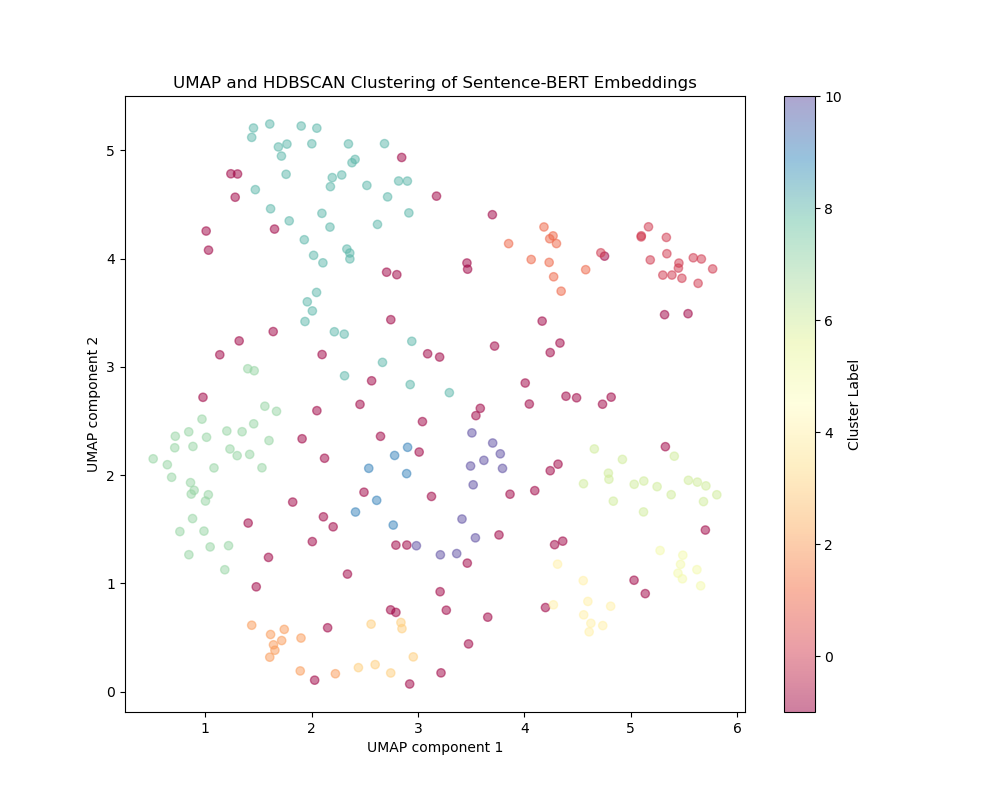

In [26]:
# To cluster similar sentences and visualize them, we will use UMAP (Uniform Manifold Approximation and Projection) for dimensionality reduction
# and HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) for clustering. UMAP helps in reducing the dimensions of the data for visualization,
# while HDBSCAN is a clustering algorithm that can find clusters of varying densities.
# To enhance the visualization, we can add interactivity to the plot using the `mplcursors` library.
# This will allow us to hover over each point to see more information about the complaints.
%matplotlib widget
import umap
import hdbscan
import matplotlib.pyplot as plt
import mplcursors 


# Step 1: Reduce dimensions using UMAP
# UMAP will help us reduce the high-dimensional embeddings to 2D for visualization
umap_reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d_umap = umap_reducer.fit_transform(embeddings.cpu().numpy())

# Step 2: Cluster the reduced embeddings using HDBSCAN
# HDBSCAN will find clusters in the data, allowing us to group similar complaints
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
cluster_labels = clusterer.fit_predict(embeddings_2d_umap)


# Plot the clustered 2D embeddings with interactivity
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d_umap[:, 0], embeddings_2d_umap[:, 1], c=cluster_labels, cmap='Spectral', alpha=0.5)
plt.title('UMAP and HDBSCAN Clustering of Sentence-BERT Embeddings')
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.colorbar(label='Cluster Label')

# Add interactive cursor
cursor = mplcursors.cursor(scatter, hover=True)

# Define what information to display when hovering over a point
@cursor.connect("add")
def on_add(sel):
    x, y = sel.target
    index = np.where((embeddings_2d_umap[:, 0] == x) & (embeddings_2d_umap[:, 1] == y))[0]
    if len(index) > 0:
        i = index[0]
        sel.annotation.set_text(f"Complaint: {complaints[i]}\nCluster: {cluster_labels[i]}")
    else:
        sel.annotation.set_text("No match found")

plt.show()


    Methodology
Sentence Embeddings with Sentence-BERT

    Model used: all-MiniLM-L6-v2

Each complaint was transformed into a dense vector that captures the semantic meaning of the sentence.

    Cosine Similarity Matrix

Computed similarity between each pair of complaints to identify closely related complaints based on meaning.

Example insight:

Complaint: "The customer service is horrible..."
→ Highly similar to other complaints about staff attitude, rudeness, and empathy.

    Dimensionality Reduction with UMAP

Reduced high-dimensional embeddings to 2D space for better visualization.

    Clustering with HDBSCAN

Identified natural groupings of complaints based on density.

Advantage: Can discover clusters of varying shapes and handle outliers.

We will expect that Many previously unclassified complaints (-1 in BERTopic) now should successfully grouped.

    Interactive Visualization with Matplotlib + mplcursors

Users can hover over each point in the scatter plot to see the original complaint and its cluster assignment.


In [27]:

survey_responses_df = survey_responses_df.rename(columns={'walmart_complaint': 'complaint'})


In [28]:

survey_res_st=survey_responses_df
survey_responses_df = survey_responses_df.rename(columns={'walmart_complaint': 'complaint'})



sentence_semantic_similarit = pd.DataFrame({
    'complaint': complaints,
    'sbert_cluster': cluster_labels
})

survey_res_st= pd.merge(survey_res_st, sentence_semantic_similarit, on='complaint', how='left')

In [29]:

survey_res_st=survey_responses_df
survey_responses_df = survey_responses_df.rename(columns={'walmart_complaint': 'complaint'})



sentence_semantic_similarit = pd.DataFrame({
    'complaint': complaints,
    'sbert_cluster': cluster_labels
})

survey_res_st= pd.merge(survey_res_st, sentence_semantic_similarit, on='complaint', how='left')

In [30]:
survey_res_st

,session_id,date_started,complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better,walmart_complaint_processed,target_better_than_walmart_processed,love_about_walmart_processed,walmart_complaint_for_bertopic,topic_walmart_complaint,keywords_walmart_complaint,sbert_cluster
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target,"[customer, service, company, give, horrible, t...","[overall, approach, customer, benefit, support...","[there, nothing, love, walmart]",customer service company give horrible tacky c...,1,"[(customer, 0.21718841347455958), (service, 0....",0
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,NaN,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart,"[would, complain, register, need, available, t...",NaN,"[love, diversity, product, offer]",would complain register need available through...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",8
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target,"[quit, taking, cash, 8checkout, dont, blame, c...","[target, still, snack, bar, unlike, walmart]","[employee, try, finely, hnt, one]",quit taking cash 8checkout dont blame coin sho...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",8
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,NaN,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart,"[dont, go, walmart, run, long, time, there, al...",NaN,"[small, town, live, walmart, place, shop, also...",dont go walmart run long time there always thi...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",7
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,NaN,The low price,Male,25-34,Texas,Walmart,"[east, waco, need, walmart, neighborhood, groc...",NaN,"[low, price]",east waco need walmart neighborhood grocery store,0,"[(walmart, 0.059261753983430934), (store, 0.04...",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,95b0f245-8a8c-4c9c-a70e-6e4746157dd7,10/02/2022 01:00,well i was in walmart and the cashier was rude...,NaN,i save money,Male,35-44,Texas,Walmart,"[well, walmart, cashier, rude, told, got, piss...",NaN,"[save, money]",well walmart cashier rude told got pissed se u...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",-1
255,489b761c-386b-4f9b-a009-4a1bdeb6baf2,10/02/2022 01:00,I would bring it to their attention that I am ...,NaN,I like how they are conveniently located to me...,Female,35-44,Texas,Walmart,"[would, bring, attention, fan, self, check, jo...",NaN,"[like, conveniently, located, budget, friendly...",would bring attention fan self check job ring ...,-1,[],-1
256,679fc05f-950c-4ecc-a139-1dcc19239661,10/02/2022 01:00,i dont like how the staff sometimes doesnt be ...,target is amazing thats my favorite go to stor...,because walmart is too much,Female,18-24,Texas,Target,"[dont, like, staff, sometimes, doesnt, type, h...","[target, amazing, thats, favorite, go, store, ...","[walmart, much]",dont like staff sometimes doesnt type help im ...,-1,[],-1
257,b127b9f3-0f98-466c-af6e-c727588b6312,10/02/2022 01:00,coupon issues should be fixed and employees sh...,NaN,everything in one place,Female,65-74,Texas,Walmart,"[coupon, issue, fixed, employee, friendly]",NaN,"[everything, one, place]",coupon issue fixed employee friendly,1,"[(customer, 0.21718841347455958), (service, 0....",-1


In [31]:

#in this approach we are not going to recluster using berttopics we just label the clusters using Berttopic and will label existing clusters 
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Initialize embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Precompute embeddings
docs = survey_res_st['walmart_complaint_processed'].apply(safe_join).tolist()
#docs = survey_res_st['walmart_complaint_processed'].tolist()


embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Get cluster labels (already computed via UMAP+HDBSCAN)
cluster_labels = survey_res_st['sbert_cluster'].tolist()

# Fit BERTopic using your own clusters
topic_model = BERTopic()
topic_model.fit(docs, embeddings=embeddings, y=cluster_labels)

# Get topics (i.e. labels for your clusters)
topics_info = topic_model.get_topic_info()
print(topics_info)

# Optional: explore topic keywords
for topic in sorted(set(cluster_labels)):
    print(f"\nCluster {topic}:")
    print(topic_model.get_topic(topic))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

   Topic  Count                             Name  \
0     -1     17  -1_ordering_item_pickup_english   
1      0     73      0_store_item_would_complain   
2      1     57       1_enough_line_open_cashier   
3      2     37    2_walmart_customer_help_thing   
4      3     26     3_complain_would_return_dont   
5      4     23     4_customer_service_poor_care   
6      5     14     5_employee_treated_rude_dumb   
7      6     12  6_nothing_previous_kinda_ghetto   

                                      Representation  \
0  [ordering, item, pickup, english, write, staff...   
1  [store, item, would, complain, produce, stock,...   
2  [enough, line, open, cashier, checkout, check,...   
3  [walmart, customer, help, thing, need, time, d...   
4  [complain, would, return, dont, know, think, l...   
5  [customer, service, poor, care, time, horrible...   
6  [employee, treated, rude, dumb, head, would, t...   
7  [nothing, previous, kinda, ghetto, donno, mind...   

                          

### Findings 

With the updated approach—where BERTopic is used only to label precomputed SBERT clusters—we observe a significant improvement in the quality and interpretability of topics:

The number of miscellaneous or noisy responses in Topic -1 has dramatically reduced from 80 to just 21.

These previously uncategorized responses have now been assigned to more appropriate and meaningful topics, increasing the overall coherence of the analysis.

As a result, we now have clearer, more focused themes that better reflect specific customer concerns.



    Topic -1: App Ordering Issues (Noise / Miscellaneous complaints)
    Topic 0: Item Availability and General Store Complaints
    Topic 1: Long Lines and Not Enough Cashiers
    Topic 2: Poor Customer Support and Unhelpful Service
    Topic 3: Issues with Returns and Refunds
    Topic 4: Poor Customer Service Experience
    Topic 5: Problems with Substituted or Missing Items in Online Orders
    Topic 6: Rude or Unprofessional Employee Behavior

In [32]:
topic_model.visualize_barchart(top_n_topics=15)

In [33]:
#Topic Intertopic Distance Map
topic_model.visualize_topics()

In [34]:
#Heatmap of Topic Similarity

topic_model.visualize_heatmap()

In [35]:
# Hierarchical Topic Reduction Tree which shows level of granularity
topic_model.visualize_hierarchy()


### Sentiment Analysis and add Sentinement into our Theme

In [36]:
#use transformer for naunced results to run sentiment analysis 
from transformers import pipeline

sentiment_pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

survey_res_st['sentiment'] = survey_res_st['walmart_complaint_processed'].apply(
    lambda x: sentiment_pipe(x[:512])[0]['label'].lower()  
)

Device set to use mps:0


#### Limitation of Model: Drawbacks of using a transformer-based sentiment analysis pipeline which is limited by the model's maximum input length 512 characters

for longer texts it can cause truncate important context however if it is longer text we can use Split Long Texts into smaller Chunks






In [37]:
survey_res_st.head()

,session_id,date_started,complaint,target_better_than_walmart,love_about_walmart,gender,age_group,state,who_does_it_better,walmart_complaint_processed,target_better_than_walmart_processed,love_about_walmart_processed,walmart_complaint_for_bertopic,topic_walmart_complaint,keywords_walmart_complaint,sbert_cluster,sentiment
0,94f2d4c3-b513-411c-b505-a11290b3f0f5,10/02/2022 01:03,The customer service that your company gives i...,Their overall approach to customers and the be...,There's nothing I LOVE about Walmart.,Male,45-54,Texas,Target,"[customer, service, company, give, horrible, t...","[overall, approach, customer, benefit, support...","[there, nothing, love, walmart]",customer service company give horrible tacky c...,1,"[(customer, 0.21718841347455958), (service, 0....",0,positive
1,1797c6f2-c501-44b7-b549-a33c29224edc,10/02/2022 01:03,I would complain about how more registers need...,NaN,I love the diversity of products that they offer.,Female,18-24,Texas,Walmart,"[would, complain, register, need, available, t...",NaN,"[love, diversity, product, offer]",would complain register need available through...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",8,positive
2,20e1a746-8311-450b-ba54-62d15f940a66,10/02/2022 01:03,Why do you quit taking cash at the 8-checkout ...,Target still has a snack bar unlike Walmart,The employees. They try when \nYou finely hnt ...,Male,55-64,Texas,Target,"[quit, taking, cash, 8checkout, dont, blame, c...","[target, still, snack, bar, unlike, walmart]","[employee, try, finely, hnt, one]",quit taking cash 8checkout dont blame coin sho...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",8,negative
3,234eb679-ffb8-4e5e-a45a-e50a7c2c4bde,10/02/2022 01:03,You don't just go into Walmart and run out for...,NaN,In the small town that I live in Walmart is no...,Male,35-44,Texas,Walmart,"[dont, go, walmart, run, long, time, there, al...",NaN,"[small, town, live, walmart, place, shop, also...",dont go walmart run long time there always thi...,0,"[(walmart, 0.059261753983430934), (store, 0.04...",7,negative
4,511293b3-42e1-4712-a3a9-8838e0044e6f,10/02/2022 01:03,East Waco needs a Walmart neighborhood grocery...,NaN,The low price,Male,25-34,Texas,Walmart,"[east, waco, need, walmart, neighborhood, groc...",NaN,"[low, price]",east waco need walmart neighborhood grocery store,0,"[(walmart, 0.059261753983430934), (store, 0.04...",-1,positive


In [38]:
survey_res_st['sbert_cluster']      # from BERTopic
survey_res_st['sentiment']  # from your sentiment analysis


0      positive
1      positive
2      negative
3      negative
4      positive
         ...   
254    positive
255    positive
256    negative
257    negative
258    negative
Name: sentiment, Length: 259, dtype: object

Group the Sentiment and topic clusters to add negative ration on it 
I dentify Identify which topics or issues (clusters) are most problematic. 


In [39]:
sentiment_cluster_dist = survey_res_st.groupby(['sbert_cluster', 'sentiment']).size().unstack(fill_value=0)
sentiment_cluster_dist['total'] = sentiment_cluster_dist.sum(axis=1)
sentiment_cluster_dist['neg_ratio'] = sentiment_cluster_dist['negative'] / sentiment_cluster_dist['total']

# Sort clusters by negativity
most_negative_clusters = sentiment_cluster_dist.sort_values('neg_ratio', ascending=False)
print(most_negative_clusters)

sentiment      negative  positive  total  neg_ratio
sbert_cluster                                      
 5                    7         2      9   0.777778
 4                    5         4      9   0.555556
 6                    8        11     19   0.421053
 7                   14        20     34   0.411765
 2                    4         6     10   0.400000
 8                   14        31     45   0.311111
-1                   24        55     79   0.303797
 0                    4        14     18   0.222222
 3                    1         6      7   0.142857
 9                    1         6      7   0.142857
 1                    0        10     10   0.000000
 10                   0        12     12   0.000000


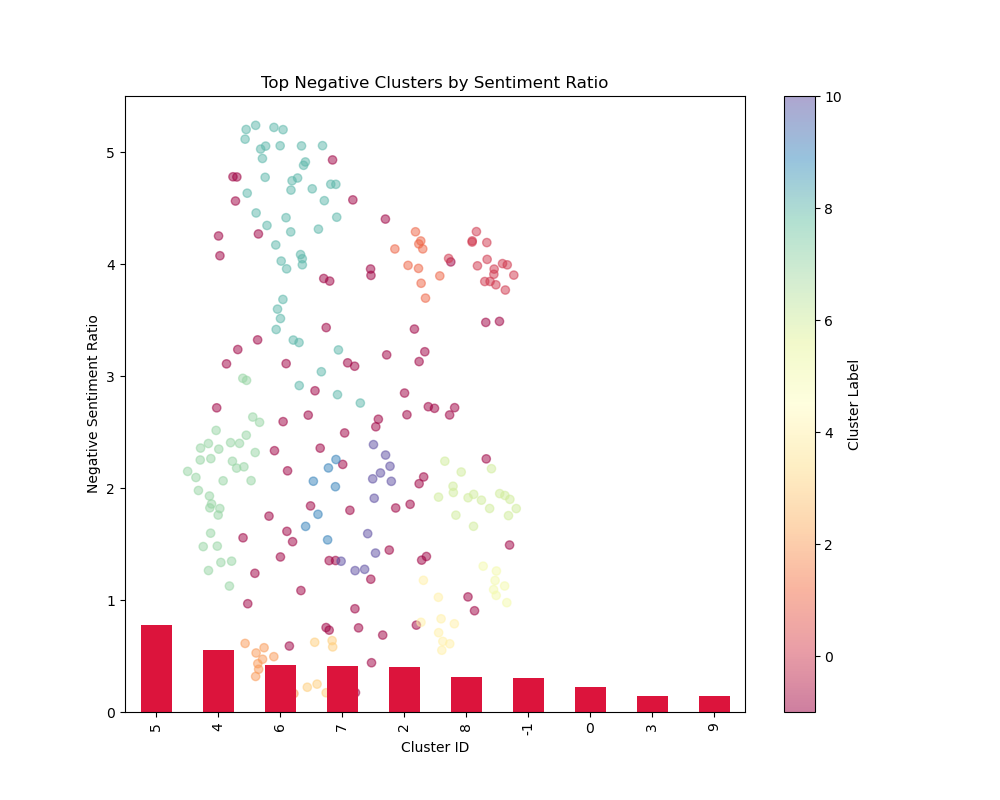

In [40]:
import matplotlib.pyplot as plt

top_n = 10
most_negative_clusters['neg_ratio'].head(top_n).plot(kind='bar', color='crimson')
plt.title("Top Negative Clusters by Sentiment Ratio")
plt.ylabel("Negative Sentiment Ratio")
plt.xlabel("Cluster ID")
plt.show()

In [41]:
#defined Topic labels 
topic_labels = {
    -1: "App Ordering Issues (Noise / Miscellaneous complaints)",
     0: "Item Availability and General Store Complaints",
     1: "Long Lines and Not Enough Cashiers",
     2: "Poor Customer Support and Unhelpful Service",
     3: "Issues with Returns and Refunds",
     4: "Poor Customer Service Experience",
     5: "Problems with Substituted or Missing Items in Online Orders",
     6: "Rude or Unprofessional Employee Behavior",
     7: "Checkout Experience and System Issues",
     8: "Late Delivery or Pickup Problems",
     9: "Product Quality Complaints",
    10: "Store Cleanliness or Safety"
}


# Add topic names to the sentiment_cluster_dist DataFrame
sentiment_cluster_dist['topic'] = sentiment_cluster_dist.index.map(topic_labels)

# Reorder columns for better readability
sentiment_cluster_dist = sentiment_cluster_dist[['topic', 'negative', 'positive', 'total', 'neg_ratio']]

# View the top 10 most negative topics
most_negative_clusters = sentiment_cluster_dist.sort_values('neg_ratio', ascending=False)
print(most_negative_clusters.head(10))



sentiment                                                  topic  negative  \
sbert_cluster                                                                
 5             Problems with Substituted or Missing Items in ...         7   
 4                              Poor Customer Service Experience         5   
 6                      Rude or Unprofessional Employee Behavior         8   
 7                         Checkout Experience and System Issues        14   
 2                   Poor Customer Support and Unhelpful Service         4   
 8                              Late Delivery or Pickup Problems        14   
-1             App Ordering Issues (Noise / Miscellaneous com...        24   
 0                Item Availability and General Store Complaints         4   
 3                               Issues with Returns and Refunds         1   
 9                                    Product Quality Complaints         1   

sentiment      positive  total  neg_ratio  
sbert_cluster      

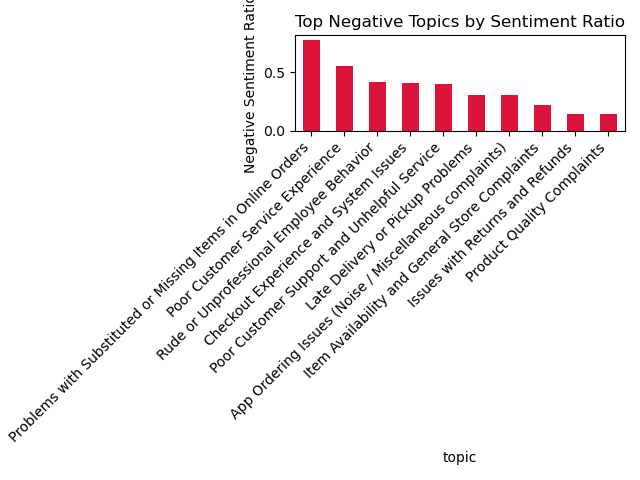

In [42]:
most_negative_clusters.head(10).reset_index().plot(
    kind='bar',
    y='neg_ratio',
    x='topic',
    color='crimson',
    legend=False
)
plt.title("Top Negative Topics by Sentiment Ratio")
plt.ylabel("Negative Sentiment Ratio")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Analysis of topic modeling and sentiment analysis reveals that the most prominent negative sentiment clusters are centered around
    
    poor customer service
    checkout/register issues
    

### Negatove Clusters    
Specifically, clusters with the highest negative sentiment ratios (e.g., Cluster 5: 77.8% negative, Cluster 4: 55.6% negative) are characterized by themes such as 
    
    “nothing good comes to mind,” 
    “dirty stores,”
    “unhygienic practices,” 
    and dissatisfaction with store 
    cleanliness and staff behavior 
    Clusters focused on checkout experiences (Cluster 7: 41.2% negative) highlight frustrations with long lines, 
    insufficient open registers, 
    and difficulties finding store associates to help

###Positive Clsuters 

Conversely, clusters with the lowest negative sentiment ratios (Clusters 1 and 10: 0% negative) are associated with positive experiences, such as 
    
    product diversity and convenience,
    suggesting that while operational issues drive dissatisfaction, Walmart’s product range and accessibility remain valued by many customers

Summary:
The dominant topics in Walmart complaints are poor customer service and operational inefficiencies at checkout, both of which are strongly associated with negative sentiment. Positive sentiment is primarily linked to product variety and convenience, indicating clear areas for improvement and strengths for Walmart


## Key Findings
- **Main Complaint Themes:**
  - Poor customer service and rude or unhelpful employees.
  - Long lines and not enough open registers at checkout.
  - Issues with product availability, store cleanliness, and returns.
  - Some complaints were about online orders, app issues, or specific store experiences.

- **What Target Does Better:**
  - Many responses praised Target for cleaner stores, better employee behavior, and higher product quality.
  - Some responses were too short or vague to be clearly categorized.

- **What Customers Love About Walmart:**
  - Low prices and good deals were the most common positive themes.
  - Many customers appreciate the convenience and variety of products at Walmart.

- **Sentiment Analysis:**
  - The most negative clusters were about poor customer service, dirty stores, and checkout issues.
  - Positive clusters focused on product variety and convenience.

## Conclusions
- **Customer service and checkout experience are the biggest pain points for Walmart customers.**
- **Walmart's strengths are low prices and product variety, which drive positive sentiment.**
- **Using advanced topic modeling and sentiment analysis helps uncover both broad and nuanced themes in customer feedback.**

## Limitations & Next Steps
- Short or vague responses are still hard to categorize.
- Sentiment analysis can be limited by model input length (long texts may be truncated).
- Future work could include more advanced clustering,Use LLms to Have betetr representation of cluster.

### Extra findings

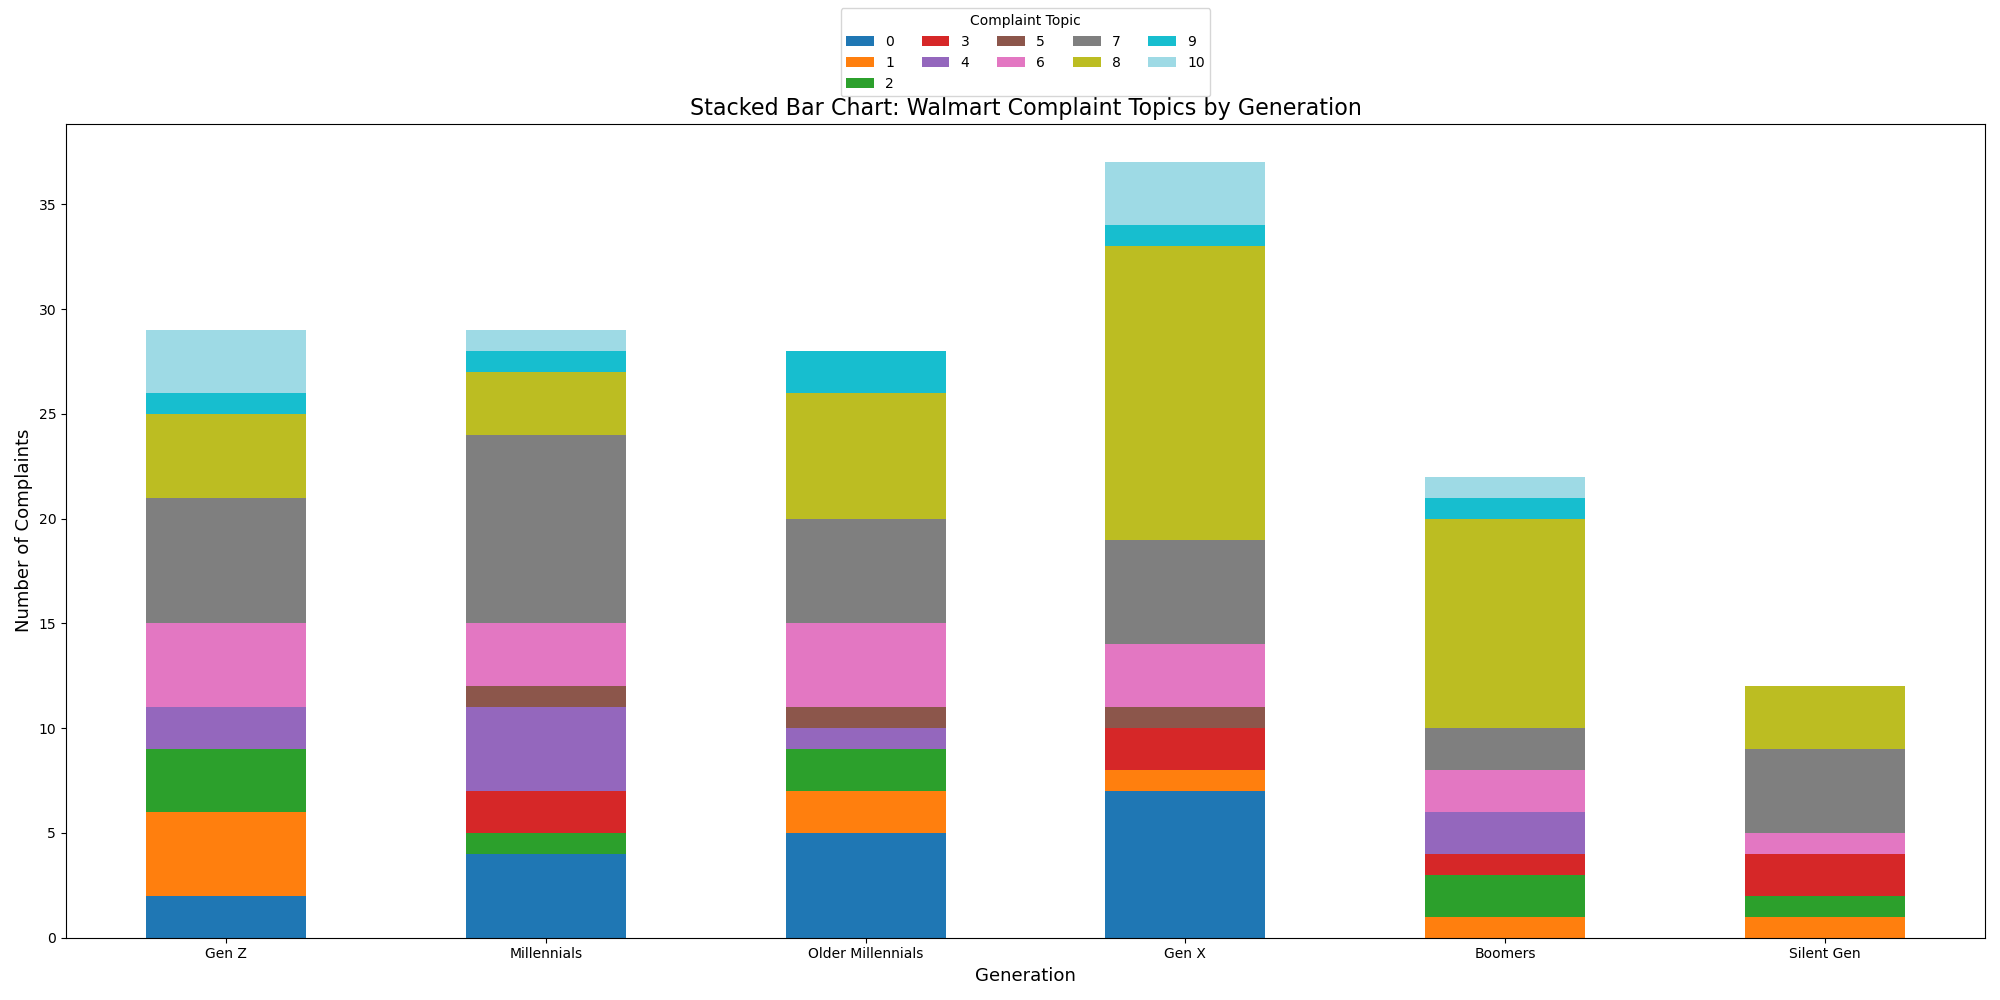

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out invalid data
survey_res_st = survey_res_st[survey_res_st['sbert_cluster'] != -1]
survey_res_st = survey_res_st[survey_res_st['age_group'].notna()]

# Map age_group to generation labels
age_to_generation = {
    '18-24': 'Gen Z',
    '25-34': 'Millennials',
    '35-44': 'Older Millennials',
    '45-54': 'Gen X',
    '55-64': 'Boomers',
    '65-74': 'Silent Gen'
}
survey_res_st['generation'] = survey_res_st['age_group'].map(age_to_generation)

# Group the data
age_topic_dist = (
    survey_res_st
    .groupby(['generation', 'sbert_cluster'])
    .size()
    .reset_index(name='count')
)

# Ensure correct order
generation_order = ['Gen Z', 'Millennials', 'Older Millennials', 'Gen X', 'Boomers', 'Silent Gen']
age_topic_dist['generation'] = pd.Categorical(age_topic_dist['generation'], categories=generation_order, ordered=True)

# Pivot for stacked bar
pivot_df = age_topic_dist.pivot(index='generation', columns='sbert_cluster', values='count').fillna(0)

# Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    colormap='tab20'  # You can change colormap to improve distinction
)

plt.title("Stacked Bar Chart: Walmart Complaint Topics by Generation", fontsize=16)
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Number of Complaints", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Complaint Topic", loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5)

#plt.legend(title="Complaint Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


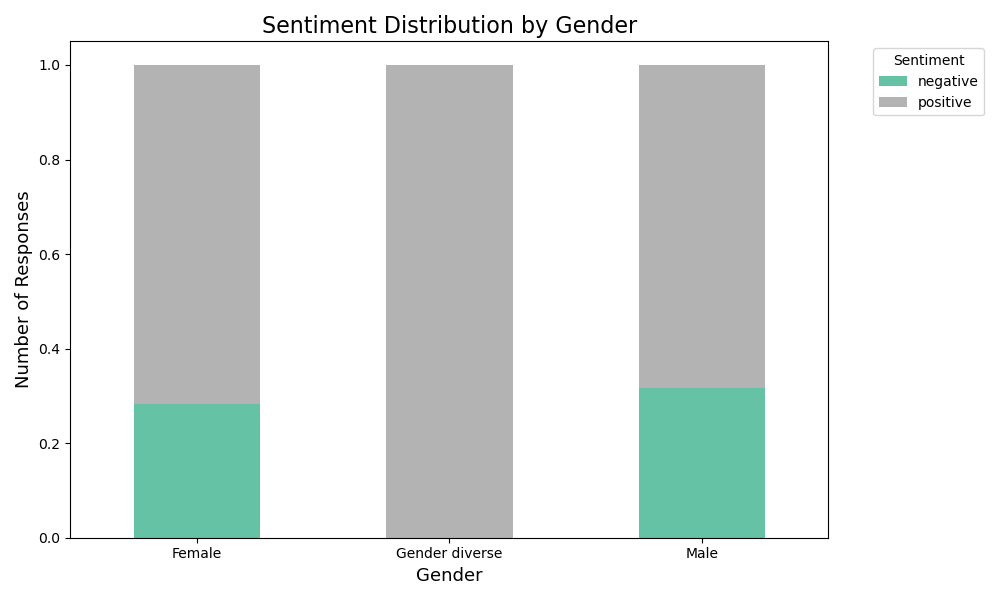

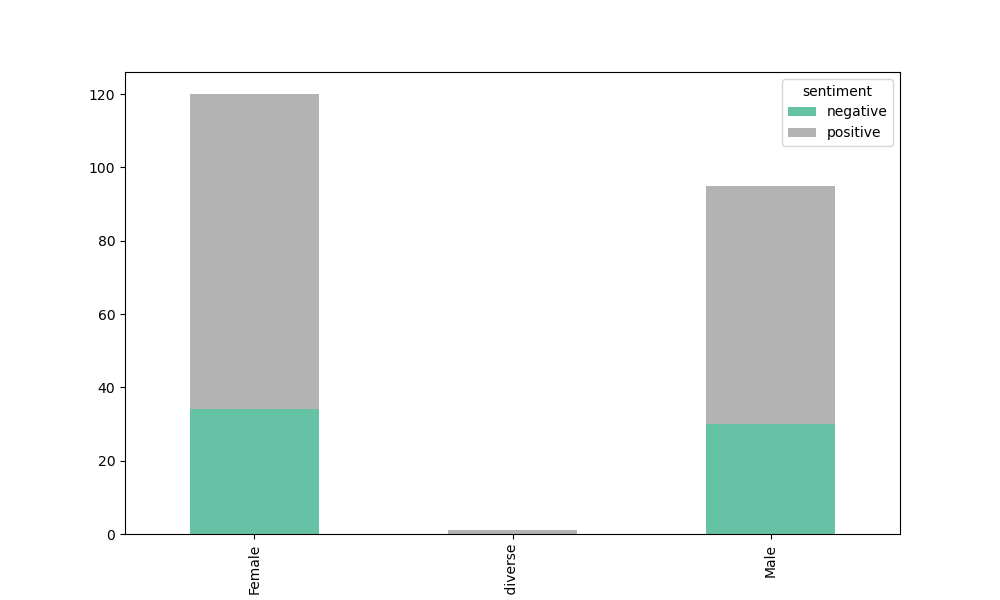

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sentiment column is available (e.g., 'sentiment' with values like 'positive', 'neutral', 'negative')
# Filter out rows with missing gender or sentiment
survey_sent = survey_res_st[
    survey_res_st['gender'].notna() &
    survey_res_st['sentiment'].notna()  
]

# Group by gender and sentiment
gender_sentiment_dist = (
    survey_sent
    .groupby(['gender', 'sentiment']) 
    .size()
    .reset_index(name='count')
)

# Pivot for stacked bar chart
pivot_sentiment = gender_sentiment_dist.pivot(index='gender', columns='sentiment', values='count').fillna(0)

# Plot stacked bar chart
pivot_sentiment.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='Set2'  # Try 'Pastel1', 'tab10', etc.
)
# pivot_percent = pivot_sentiment.div(pivot_sentiment.sum(axis=1), axis=0)
pivot_percent.plot(kind="bar", stacked=True, colormap="Set2", figsize=(10, 6))

plt.title("Sentiment Distribution by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Number of Responses", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



###  Summary: Walmart Complaint Topics by Generation

This stacked bar chart visualizes the distribution of various complaint topics made by different generations regarding their Walmart experience. The data was grouped by generation and complaint topic, with topics mapped to specific issues such as customer service, checkout experience, product quality, and more.

---

####  Gen X Has the Highest Complaint Volume
Gen X stands out with the **highest number of total complaints** among all generations.

Key issues include:
- **Late Delivery or Pickup Problems**
- **Checkout Experience and System Issues**

---

####  Customer Experience Issues Are Common Across Generations
- **"Rude or Unprofessional Employee Behavior"** and **"Poor Customer Service Experience"** are frequently reported across:
  - **Millennials**
  - **Gen Z**
  - **Older Millennials**

This suggests **employee-customer interaction** is a consistent problem across younger generations.

---

####  Boomers and Silent Gen Are Less Likely to Complain
- These generations show the **lowest number of total complaints**.
- Their top concern is:
  - **Late Delivery or Pickup Problems**

This may indicate a **digital experience gap** in the older demographic.

---

####  Technical and System Issues Are Prominent Among Younger Generations
- **Gen Z** and **Millennials** report relatively more issues related to:
  - **App Ordering Problems**
  - **Checkout Experience**

This reflects a **greater reliance on digital and self-service options** among younger shoppers.

---

####  Returns and Refunds Are a Lesser Concern
- Complaints related to **Returns and Refunds** and **Product Quality** are consistently **low across all generations**.
- This may indicate:
  - Fewer actual issues in these areas, or
  - Lower customer sensitivity to these aspects.

---




